In [47]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Load the data
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


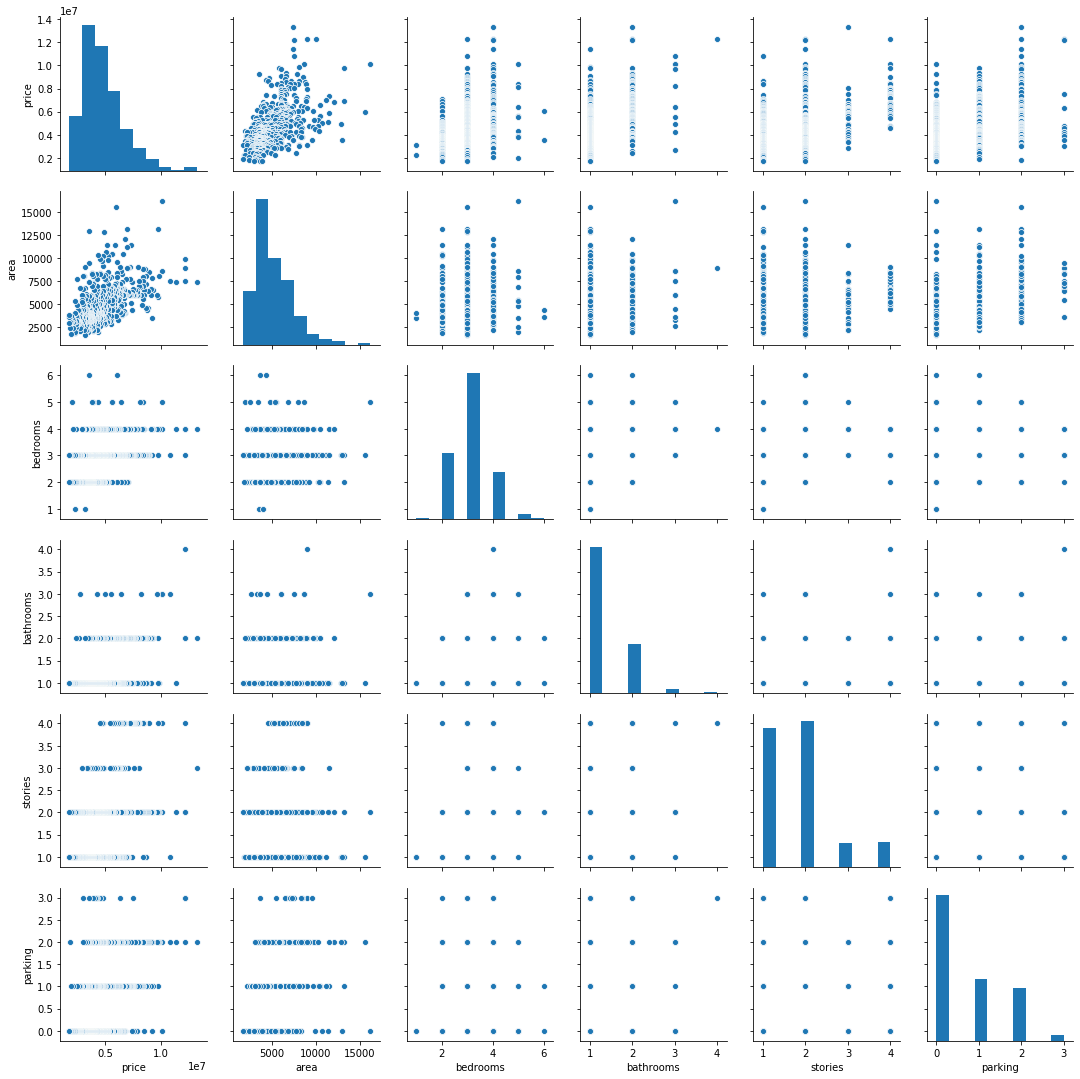

In [6]:
# Lets visualise the numeric variables
sns.pairplot(df)

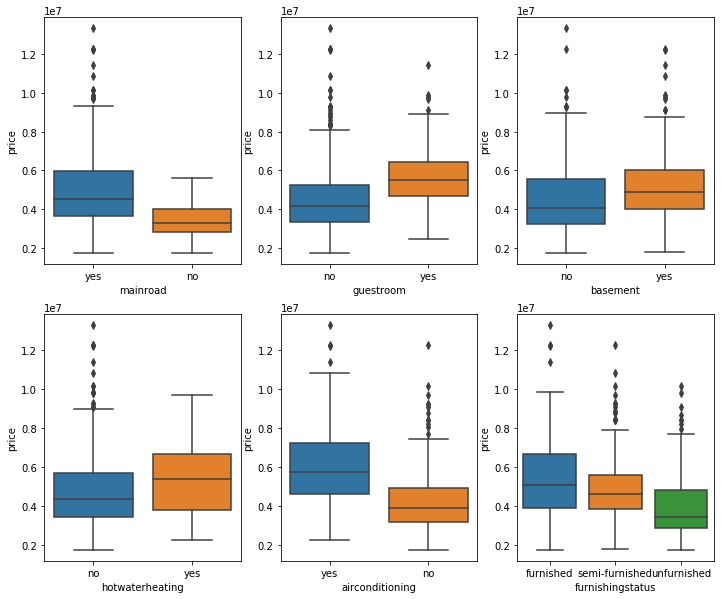

In [7]:
# lets visualise the categorical variable
plt.figure(figsize=(12,10))  # to control the size of the figure
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y='price', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='guestroom', y='price', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='basement', y='price', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='airconditioning', y='price', data=df)

plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y='price', data=df)

# preparing the data for modelling
- Encoding:
    - Converting binary variables to 0/1
    - others categorical variables to dummy variables
- Splitting into train and Test
- Rescaling the data

In [8]:
print("mainroad")
print(df.mainroad.value_counts())

print("guestroom")
print(df.guestroom.value_counts())

print("basement")
print(df.basement.value_counts())

print("hotwaterheating")
print(df.hotwaterheating.value_counts())

print("airconditioning")
print(df.airconditioning.value_counts())

print("prefarea")
print(df.prefarea.value_counts())



mainroad
yes    468
no      77
Name: mainroad, dtype: int64
guestroom
no     448
yes     97
Name: guestroom, dtype: int64
basement
no     354
yes    191
Name: basement, dtype: int64
hotwaterheating
no     520
yes     25
Name: hotwaterheating, dtype: int64
airconditioning
no     373
yes    172
Name: airconditioning, dtype: int64
prefarea
no     417
yes    128
Name: prefarea, dtype: int64


In [9]:
# yes/no vars
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no


In [10]:
# mapping the yes's to 1 and no's to 0
df[varlist] = df[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [11]:
# converting furnishingstatus var to numeric by creating dummy var since it has more than two categories
status = pd.get_dummies(df['furnishingstatus'], drop_first=True) # droppin the redundant var
status.head()

# 00 corresponds to furnished
# 01 corresponds to unfurnished
# 10 corresponds to semi-furnished

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [12]:
# to join the abv dataset to the original one we wil use the concat method
df = pd.concat([df, status], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [13]:
# dropping the furnishingstatus var since we dont need it
df = df.drop(['furnishingstatus'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [14]:
# splitting the data 
df_train, df_test = train_test_split(df, train_size = 0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


## Rescaling the features
 1. Min-Max scaling (normalisation: Between 0 and 1)
 2. Standardisation (mean-0, sigma-1(std)) 

#### normalisation: (x - xmin)/(xmax - xmin)
#### standardisation: (x - mu)/(sigma) 

In [15]:
# 1. Instantiate an object
scaler = MinMaxScaler()
# create a list of numeric variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [16]:
# fit(): learns xmin ,xmax
# transform(): x-xmin/xmax-xmin
# fit_transform(): 

In [17]:
df_train[num_vars].describe()

,area,bedrooms,bathrooms,stories,parking,price
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.288710,0.386352,0.136483,0.268591,0.242345,0.260333
std,0.181420,0.147336,0.237325,0.295001,0.285933,0.157607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155227,0.200000,0.000000,0.000000,0.000000,0.151515
50%,0.234424,0.400000,0.000000,0.333333,0.000000,0.221212
75%,0.398099,0.400000,0.500000,0.333333,0.333333,0.345455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the model

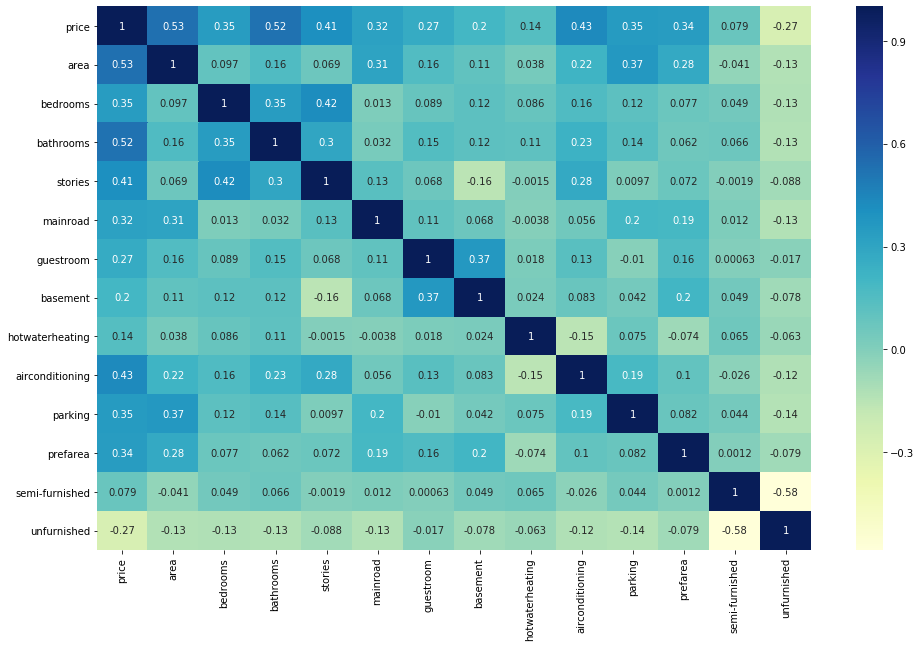

In [18]:
# heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

In [19]:
# X_train, y_train
X_train = df_train
y_train = df_train.pop('price')

In [20]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [21]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

- statistical significance of the variables
- VIF

In [22]:
# add a constant 
X_train_sm = sm.add_constant(X_train['area'])

# create first model

lr = sm.OLS(y_train, X_train_sm)

#fit 

lr_model = lr.fit()

#params
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [23]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           3.15e-29
Time:                        21:59:57   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R2 = 0.283, which means about 28% of variance in 'price' is explained by the variable 'area'.

In [24]:
# add another variable "bathrooms"
X_train_sm2 = sm.add_constant(X_train[['area', 'bathrooms']])

# create second model
lr2 = sm.OLS(y_train, X_train_sm2)

# fit
lr_model2= lr2.fit()

#params
lr_model2.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [25]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           2.51e-54
Time:                        21:59:57   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# add another variable "bedrooms"
X_train_sm3 = sm.add_constant(X_train[['area', 'bathrooms', 'bedrooms']])

# Create third model
lr3 = sm.OLS(y_train, X_train_sm3)

#fit
lr_model3 = lr3.fit()

#params
lr_model3.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [27]:
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           3.12e-57
Time:                        21:59:57   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The forward selection method can be very tidious if there are many variables in the data.
- So, now lets try the backward selection method 

In [28]:
# adding all the variables and shall remove as the need arises
X_train_sm_all_vars = sm.add_constant(X_train)

# create a model with all vars
lr_all_vars = sm.OLS(y_train, X_train_sm_all_vars)

# fit 
lr_model_all_vars = lr_all_vars.fit()

# params
lr_model_all_vars.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [29]:
lr_model_all_vars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           8.83e-83
Time:                        21:59:57   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking the VIF
- Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.The higher a variable is related to all the other variables, the higher the VIF of that variable. The formula for calculating VIF is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $ 

What does a VIF of 5 mean?
- 5 = 1/(1-r2)
- 1-r2 = 0.2
- r2 = 0.8
- Here, r2 = 0.8 which means that almost 80% of variance in this variable is explained by other variables.

In [30]:
# Create a Dataframe that will contain the names of all the feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


We could have a variable with:
- High p-value, High VIF  (This is a no-brainer and we go ahead and drop this variable)
- High-low:
    - High p-value, low VIF (remove this first and check the VIFs again by building a new model)
    - Low p-value, High VIF (remove this after the ones above)
- Low p-value, Low VIF (Again a no-brainer and we keep this variable)

In [31]:
# dropping 'semi-furnished' since it has a very high p-value.
X = X_train.drop('semi-furnished', axis = 1)

In [32]:
# Create a new model after dropping 'semi-furnished'
X_train_sm_new = sm.add_constant(X)
lr_new = sm.OLS(y_train, X_train_sm_new)
# fit the model
lr_model_new = lr_new.fit()
# model summary
print(lr_model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.07e-83
Time:                        21:59:57   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [33]:
# Checking the VIF after dropping 'semi-furnished'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [34]:
# dropping 'bedrooms' since it has both high p-value and high VIF
X = X.drop('bedrooms', axis = 1)

In [35]:
# Creating a new model after dropping 'bedrooms'
X_train_sm_new_1 = sm.add_constant(X)
lr_new1 = sm.OLS(y_train, X_train_sm_new_1)
# fit the model
lr_model_new1 = lr_new1.fit()
# model summary
print(lr_model_new1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           2.73e-84
Time:                        21:59:57   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [36]:
# Checking the VIF after dropping 'bedrooms'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


## Residual Analysis
Residual is the actual y_train - predicted values of y

In [37]:
y_train_pred = lr_model_new1.predict(X_train_sm_new_1)

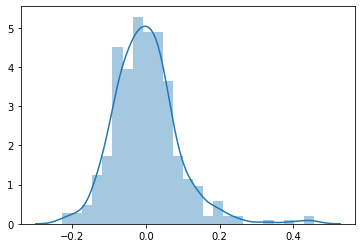

In [38]:
res = y_train - y_train_pred
sns.distplot(res)

## Prediction and Evaluation on the test set

In [39]:
# create a list of numeric variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [41]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
y_test = df_test.pop('price')
X_test = df_test

In [43]:
# add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [44]:
X_test_sm = X_test_sm.drop(['bedrooms', 'semi-furnished'], axis=1)

In [46]:
# predict
y_test_pred = lr_model_new1.predict(X_test_sm)
y_test_pred.head()

265    0.204980
54     0.425613
171    0.339321
244    0.309397
268    0.254629
dtype: float64

In [48]:
# evaluate the model
r2_score(y_true=y_test, y_pred=y_test_pred)

0.6713505684480789

We can see that the equation of our best fitted line is:

price =  0.2347 x area + 0.1965 x bathrooms + 0.1178 x stories + 0.0488 x mainroad + 0.0301 x guestroom + 0.0239 x basement + 0.0864 x hotwaterheating + 0.0665 x airconditioning + 0.0629 x parking + 0.0596 x prefarea + -0.0323 x unfurnished.